In [3]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
print(sns.__version__)

0.11.2


In [4]:
# Upload the dataset into notebook

dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### EDA


In [7]:
# Check if there are any null values in the data

dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Dropping the null rows 

dataset.dropna(axis=0,inplace=True)

In [9]:
# Dropping id column 

df = dataset.drop(['id'], axis = 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
df = df[df.gender != 'Other']

In [12]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

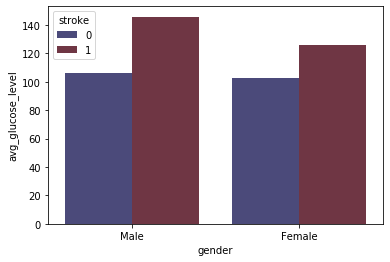

In [13]:
sns.barplot(x=df.gender,y=df.avg_glucose_level,hue=df.stroke,estimator=np.average ,ci=None,palette='icefire')

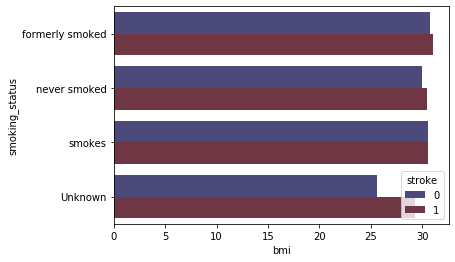

In [14]:
sns.barplot(y=df.smoking_status,x=df.bmi,hue=df.stroke,estimator=np.average ,ci=None,palette='icefire')

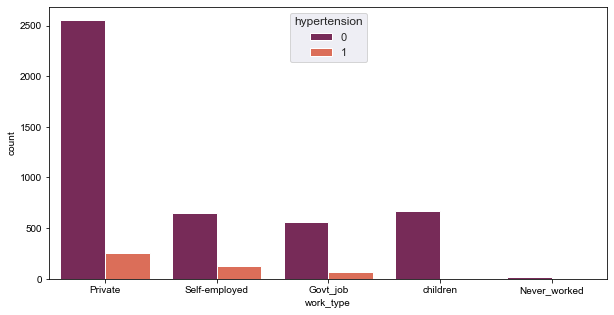

In [15]:
ax=plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x=df['work_type'],hue=df['hypertension'],palette='rocket')


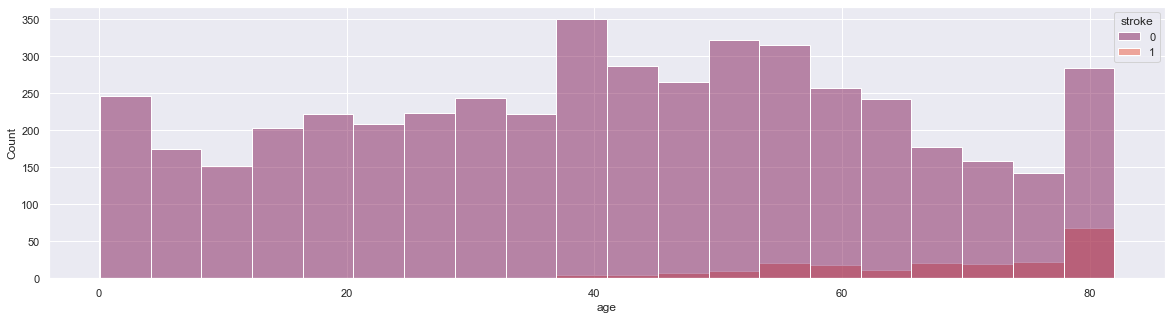

In [16]:
ax=plt.subplots(figsize=(20,5))
sns.set(style="darkgrid")
sns.histplot(x=df['age'], hue=df.stroke, palette='rocket')

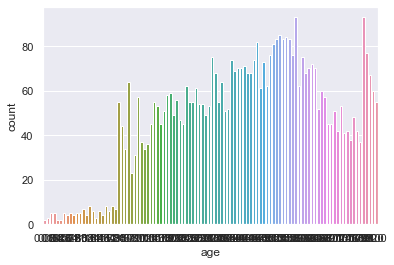

In [17]:
sns.countplot(x=df['age'])

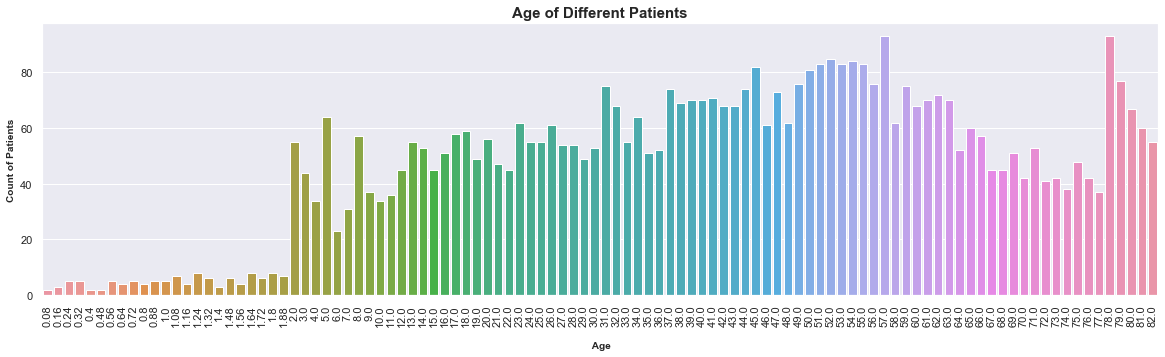

In [18]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(x=df.age)
plt.xticks(rotation=90)
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()

In [101]:
df = df[~(df['age'] <= 2)]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
df.shape

(4739, 11)

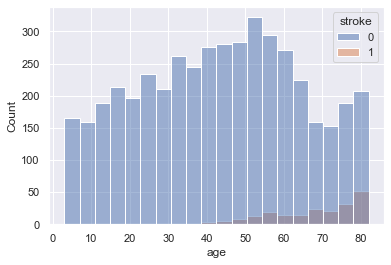

In [21]:
sns.histplot(x=df['age'], hue=df.stroke)

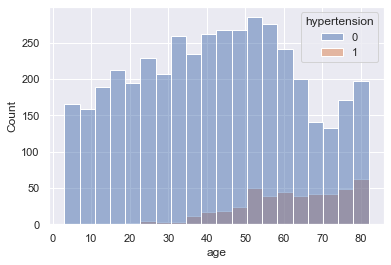

In [22]:
sns.histplot(x=df['age'], hue=df.hypertension)

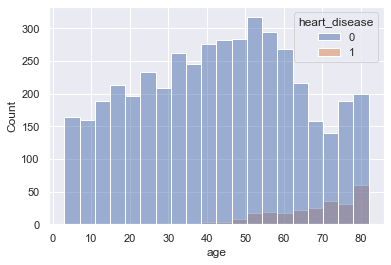

In [23]:

sns.histplot(x=df['age'], hue=df.heart_disease)

In [24]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4739.0,44.347542,21.526656,3.00,27.00,45.00,61.00,82.00
hypertension,4739.0,0.095168,0.293477,0.00,0.00,0.00,0.00,1.00
heart_disease,4739.0,0.051066,0.220155,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4739.0,105.640698,44.873659,55.12,77.09,91.68,113.71,271.74
bmi,4739.0,29.258936,7.725934,11.30,24.10,28.30,33.30,97.60
stroke,4739.0,0.044102,0.205344,0.00,0.00,0.00,0.00,1.00


In [26]:
#Converting object dtype to int 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
ohe=OneHotEncoder()

In [27]:
# Seperating based on datatypes 

df_cat = df.select_dtypes(include=object)
df_int=df.select_dtypes(exclude=object)

In [28]:
df_cat_encoded = df_cat.apply(le.fit_transform)
df_cat_encoded.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
5,1,1,2,1,1


In [29]:
df_final= pd.concat([df_cat_encoded,df_int],axis=1)

In [30]:
df_final.dtypes

gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [31]:
df_final.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.6,1
2,1,1,2,0,2,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,79.0,1,0,174.12,24.0,1
5,1,1,2,1,1,81.0,0,0,186.21,29.0,1


In [32]:
df_final.shape

(4739, 11)

In [33]:
dfcolumns=df_final.columns

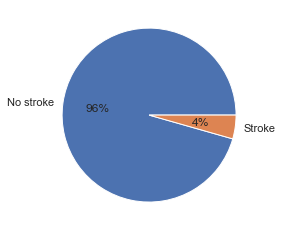

In [34]:
plt.pie(df['stroke'].value_counts(),labels=('No stroke','Stroke'),autopct='%.0f%%')
plt.show()

In [35]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

In [36]:
# Seperating the data into dependent and Independent variables
X = df_final.drop(['stroke'], axis = 1)
Y = df_final['stroke']

In [37]:
# Seperating the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.60, random_state = 101)

In [38]:
print(x_train.shape)
print(x_val.shape)

(1895, 10)
(2844, 10)


In [44]:
ytrain=pd.DataFrame(y_train)
ytrain.stroke.value_counts()

0    1815
1      80
Name: stroke, dtype: int64

In [41]:
# Applying oversampling techniques to the training dataset 

In [45]:
# transform the training dataset using SMOTE
oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x_train,y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1815, 1: 1815})


In [46]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=500)

lg.fit(x,y)

LogisticRegression(max_iter=500)

In [47]:
out = lg.predict(x_val)

In [48]:
acc = metrics.accuracy_score(y_val, out)
acc

0.8217299578059072

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x,y)

DecisionTreeClassifier()

In [51]:
out_dt = dt.predict(x_val)

In [52]:
accdt = metrics.accuracy_score(y_val, out_dt)
accdt

0.8987341772151899

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=600,criterion='entropy')

In [55]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=600)

In [56]:
out_rf = rf.predict(x_val)

In [57]:
accrf = metrics.accuracy_score(y_val, out_rf)
accrf

0.9240506329113924

In [58]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [60]:
clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [61]:
out_svm = clf.predict(x_val)

In [62]:
accsvm = metrics.accuracy_score(y_val, out_svm)
accsvm

0.8579465541490858

In [104]:
print("Logistic Regression")
print(metrics.classification_report(y_val, out))
print("Decision Tree")
print(metrics.classification_report(y_val, out_dt))
print("Random Forest")
print(metrics.classification_report(y_val, out_rf))
print("SVM")
print(metrics.classification_report(y_val, out_svm))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      2715
           1       0.14      0.64      0.22       129

    accuracy                           0.80      2844
   macro avg       0.56      0.72      0.55      2844
weighted avg       0.94      0.80      0.85      2844

Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2715
           1       0.13      0.21      0.16       129

    accuracy                           0.90      2844
   macro avg       0.55      0.57      0.56      2844
weighted avg       0.92      0.90      0.91      2844

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2715
           1       0.15      0.11      0.13       129

    accuracy                           0.93      2844
   macro avg       0.55      0.54      0.55      2844
weighted avg       0.92   

In [63]:
from sklearn.metrics import f1_score,confusion_matrix
confusion_matrix(y_val, out)

array([[2273,  442],
       [  65,   64]], dtype=int64)

In [64]:
Precision=(82/(82+524))
Precision

0.1353135313531353

In [66]:
Rec=(82/(82+47))
Rec

0.6356589147286822

In [67]:
f1=((Precision*Rec)*2)/(Precision+Rec)
f1

0.2231292517006803

In [68]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [69]:
pr=precision_score(y_val,out)
rc=recall_score(y_val,out)
f1=f1_score(y_val,out)

In [70]:
pr=precision_score(y_val,out_rf)
rc=recall_score(y_val,out_rf)
f1=f1_score(y_val,out_rf)

In [71]:
pr

0.152

In [72]:
rc

0.14728682170542637

In [73]:
f1

0.14960629921259844

In [106]:
confusion_matrix(y_val, out_dt)

array([[2539,  176],
       [ 102,   27]])

In [107]:
confusion_matrix(y_val, out_rf)

array([[2636,   79],
       [ 115,   14]])

In [108]:
confusion_matrix(y_val, out_svm)

array([[2508,  207],
       [ 100,   29]])

In [74]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')


In [81]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(x_val)
NNH.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [82]:
predicted_labels = NNH.predict(x_val)

C:\Users\gs11\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [83]:
# summarize the fit of the model
print("KNeighborsClassifier")
print(metrics.classification_report(y_val, predicted_labels))

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2715
           1       0.07      0.02      0.04       129

    accuracy                           0.94      2844
   macro avg       0.51      0.50      0.50      2844
weighted avg       0.91      0.94      0.93      2844



In [84]:
from sklearn.model_selection import cross_validate

In [85]:
cv_results = cross_validate(rf,X,Y,cv=5)

In [86]:
cv_results

{'fit_time': array([3.06619263, 3.13403773, 3.11502719, 2.80503058, 2.77801585]),
 'score_time': array([0.1730082 , 0.23700833, 0.15400267, 0.15200424, 0.15500379]),
 'test_score': array([0.9535865 , 0.9556962 , 0.95464135, 0.9556962 , 0.95670539])}

In [89]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg,X,Y, cv=5)

In [90]:
scores

array([0.9556962 , 0.9556962 , 0.9556962 , 0.95464135, 0.95776135])

In [95]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(rf, X, Y, cv=cv)

array([0.95780591, 0.9535865 , 0.95499297, 0.95428973, 0.95639944])

In [96]:
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(rf, X, Y, cv=cv)

array([0.95850914, 0.95428973, 0.95499297, 0.95428973, 0.9556962 ])

In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [99]:
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(x_train,y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1037, 1: 726})


In [128]:
trial = pd.read_csv('healthcare-dataset-stroke-data.csv', header=0,
 index_col=0, quotechar='"', sep=':',
 na_values = ['na', '-', '.', ''])


In [129]:
trial.head()

""
"id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke"
"9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1"
"51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1"
"31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1"
"60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1"
"1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1"
